In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path
import json

import pandas as pd

def show_date(dt):
   
    ds = load_data(dt)
    rl = ds['rl']
    linear = ds['linear']
    
    f, axes = plt.subplots(nrows=4, figsize=(15, 5))

    rl.plot(y='action', ax=axes[0], label='rl')
    linear.plot(y='Gross [MW]', ax=axes[0], label='linear')

    diff_act = rl['action'] - linear['Gross [MW]']
    price_wtd = diff_act * rl['price [$/MWh]']
    diff_act.plot(ax=axes[2], label='action-difference')
    price_wtd.plot(ax=axes[2], label='action-difference')

    rl.plot(y='price [$/MWh]', ax=axes[1])
    linear.plot(y='Prices [$/MWh]', ax=axes[1])
    
    rl['observation-51'].plot(ax=axes[3], label='rl')
    linear['Initial charge [MWh]'].plot(ax=axes[3], label='linear')
    axes[3].legend()
    
    return f, ds


def load_data(dt):
    ds = {}
    h = Path.home() / 'experiments' / 'experiment-0'
    linear = pd.read_csv((h / 'linear' / dt).with_suffix('.csv'))
    ds['linear'] = linear

    rl = pd.read_csv(h / 'results' / dt / 'rl.csv')
    rl['action'] = rl['action-0'] * 2
    ds['rl'] = rl
    
    ds['all'] = pd.read_csv('./results/results.csv', index_col='date')
    
    ds['dataset'] = pd.read_csv((h / 'dataset' / 'test-episodes' / dt).with_suffix('.csv'))
    return ds

In [2]:
dts = [p for p in (Path.cwd() / 'results').iterdir() if p.is_dir()]
dt = str(dts[0].stem)

In [3]:
ds = load_data(dt)
data = ds['all']
data['diff'] = data['linear-cost'] - data['rl-cost']
data.sort_values('diff')

,linear-cost,rl-cost,diff
date,,,
2019-12-19,-31529.375939,-808.494202,-30720.881737
2020-01-30,-34839.792205,-9427.070312,-25412.721893
2020-02-03,-4558.782098,-298.404266,-4260.377832
2019-11-07,-4477.363641,-1112.080566,-3365.283075
2019-11-10,-4225.409918,-1460.046875,-2765.363043
...,...,...,...
2019-09-10,-829.082005,-826.723755,-2.358250
2020-08-12,-330.673729,-330.625000,-0.048729
2020-01-20,-218.679183,-219.308868,0.629686


In [4]:
ds['rl'][['interval-start', 'action-0', 'reward-0', 'price [$/MWh]'] + [f'observation-{n}' for n in range(24)]].head(3)

,interval-start,action-0,reward-0,price [$/MWh],observation-0,observation-1,observation-2,observation-3,observation-4,observation-5,...,observation-14,observation-15,observation-16,observation-17,observation-18,observation-19,observation-20,observation-21,observation-22,observation-23
0,2020-06-17 14:25:00,0.943892,-43.305763,45.88,0.344238,0.361147,0.501075,0.515875,0.474419,0.425790,...,0.517669,0.435949,0.407066,0.239036,0.253250,0.310964,0.206628,0.184991,0.148263,0.103505
1,2020-06-17 14:55:00,0.511246,-23.910961,46.77,0.361158,0.501080,0.515891,0.474429,0.425800,0.938567,...,0.435964,0.407077,0.239036,0.253250,0.310964,0.206628,0.184991,0.148263,0.103505,0.086830
2,2020-06-17 15:25:00,0.768872,-46.555214,60.55,0.501095,0.515896,0.474440,0.425810,0.938567,0.992863,...,0.407092,0.239051,0.253250,0.310964,0.206628,0.184991,0.148263,0.103505,0.086830,0.048747


In [5]:
ds['rl'][['interval-start', 'action-0', 'reward-0', 'price [$/MWh]'] + [f'observation-{n}' for n in range(10)]].tail(5)

,interval-start,action-0,reward-0,price [$/MWh],observation-0,observation-1,observation-2,observation-3,observation-4,observation-5,observation-6,observation-7,observation-8,observation-9
43,2020-06-18 11:55:00,0.983863,8.864604,-9.01,0.009033,0.002551,0.018461,0.038674,0.020099,0.01839,-0.5,-0.5,-0.5,-0.5
44,2020-06-18 12:25:00,0.955659,67.469510,-70.60,0.002551,0.018461,0.038674,0.020099,0.018390,-0.50000,-0.5,-0.5,-0.5,-0.5
45,2020-06-18 12:55:00,0.529990,-3.603931,6.80,0.018461,0.038674,0.020099,0.018390,-0.500000,-0.50000,-0.5,-0.5,-0.5,-0.5
46,2020-06-18 13:25:00,0.607873,-3.785268,13.45,0.038674,0.020099,0.018390,-0.500000,-0.500000,-0.50000,-0.5,-0.5,-0.5,-0.5
47,2020-06-18 13:55:00,0.796668,0.000000,7.92,0.020099,0.018390,-0.500000,-0.500000,-0.500000,-0.50000,-0.5,-0.5,-0.5,-0.5


## Raw dataset created during expt `create_dataset` looks fine:

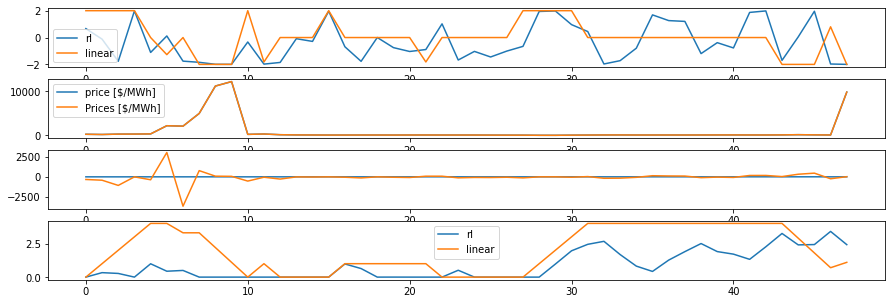

In [6]:
# , '2019-12-19'
f, ds = show_date('2020-01-30')

In [ ]:
ds['rl'].head(14)

In [ ]:
ds['dataset'].head(4)